#!/usr/bin/python

In [135]:
import matplotlib.pyplot as plt
from prep_terrain_data import makeTerrainData
from class_vis import prettyPicture

import numpy as np
from sklearn.grid_search import ParameterGrid
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

In [2]:
features_train, labels_train, features_test, labels_test = makeTerrainData()
### the training data (features_train, labels_train) have both "fast" and "slow"
### points mixed together--separate them so we can give them different colors
### in the scatterplot and identify them visually
grade_fast = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==0]
bumpy_fast = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==0]
grade_slow = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==1]
bumpy_slow = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==1]

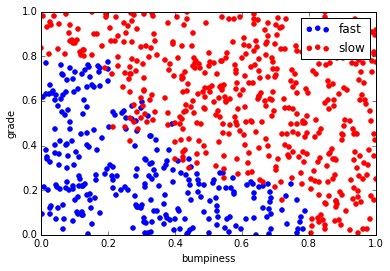

In [3]:
#### initial visualization
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.scatter(bumpy_fast, grade_fast, color = "b", label="fast")
plt.scatter(grade_slow, bumpy_slow, color = "r", label="slow")
plt.legend()
plt.xlabel("bumpiness")
plt.ylabel("grade")
plt.show()

In [4]:
def parameters_search(estimator, param_grid, features_train, labels_train, features_test, labels_test, score='accuracy', cv=5):
    # Set the parameters by cross-validation
    clf = GridSearchCV(estimator, param_grid, cv=cv, scoring=score)
    clf.fit(features_train, labels_train)

    print "Best parameters set found on development set:"
    print "%s --> accuracy = %s" % (clf.best_params_, clf.score(features_test, labels_test))
    print "Grid scores on development set:"
    for params, mean_score, scores in clf.grid_scores_:
        print "%0.3f (+/-%0.03f) for %r" % (mean_score, scores.std() * 3, params)
    print "Detailed classification report:"
    y_true, y_pred = labels_test, clf.predict(features_test)
    print classification_report(y_true, y_pred)
    return clf

AdaBoostClassifier

Best parameters set found on development set:
{'n_estimators': 12, 'learning_rate': 1.0} --> accuracy = 0.924
Grid scores on development set:
0.788 (+/-0.057) for {'n_estimators': 2, 'learning_rate': 0.5}
0.876 (+/-0.098) for {'n_estimators': 4, 'learning_rate': 0.5}
0.943 (+/-0.046) for {'n_estimators': 6, 'learning_rate': 0.5}
0.936 (+/-0.068) for {'n_estimators': 8, 'learning_rate': 0.5}
0.939 (+/-0.046) for {'n_estimators': 10, 'learning_rate': 0.5}
0.943 (+/-0.047) for {'n_estimators': 12, 'learning_rate': 0.5}
0.948 (+/-0.064) for {'n_estimators': 14, 'learning_rate': 0.5}
0.952 (+/-0.051) for {'n_estimators': 16, 'learning_rate': 0.5}
0.947 (+/-0.051) for {'n_estimators': 18, 'learning_rate': 0.5}
0.956 (+/-0.047) for {'n_estimators': 21, 'learning_rate': 0.5}
0.952 (+/-0.045) for {'n_estimators': 23, 'learning_rate': 0.5}
0.956 (+/-0.028) for {'n_estimators': 25, 'learning_rate': 0.5}
0.957 (+/-0.024) for {'n_estimators': 27, 'learning_rate': 0.5}
0.961 (+/-0.015) for {'n_estim

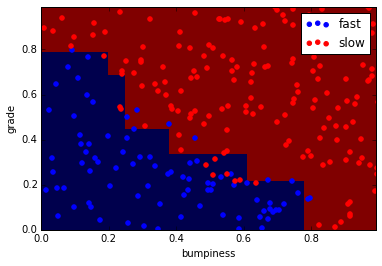

In [133]:
n_estimators_range = np.linspace(2, 40, 19).astype(int)
learning_rate_range = np.linspace(0.5, 1.5, 11)
param_grid = dict(learning_rate=learning_rate_range, n_estimators=n_estimators_range)
clf = parameters_search(AdaBoostClassifier(random_state=0), param_grid, features_train, labels_train, features_test, labels_test)
try:
    prettyPicture(clf, features_test, labels_test)
except NameError:
    pass

#clf = AdaBoostClassifier()
#for g in ParameterGrid(param_grid):
#    clf.set_params(**g)
#    clf.fit(features_train, labels_train)
#    print "%s -> accuracy = %s" % (g, clf.score(features_test, labels_test))

RandomForestClassifier

Best parameters set found on development set:
{'n_estimators': 18} --> accuracy = 0.924
Grid scores on development set:
0.960 (+/-0.025) for {'n_estimators': 15}
0.959 (+/-0.015) for {'n_estimators': 16}
0.960 (+/-0.018) for {'n_estimators': 17}
0.961 (+/-0.015) for {'n_estimators': 18}
0.959 (+/-0.015) for {'n_estimators': 19}
0.961 (+/-0.015) for {'n_estimators': 20}
0.957 (+/-0.010) for {'n_estimators': 21}
0.957 (+/-0.020) for {'n_estimators': 22}
0.959 (+/-0.015) for {'n_estimators': 23}
0.955 (+/-0.015) for {'n_estimators': 24}
0.956 (+/-0.016) for {'n_estimators': 25}
Detailed classification report:
             precision    recall  f1-score   support

        0.0       0.88      0.89      0.89        84
        1.0       0.95      0.94      0.94       166

avg / total       0.92      0.92      0.92       250



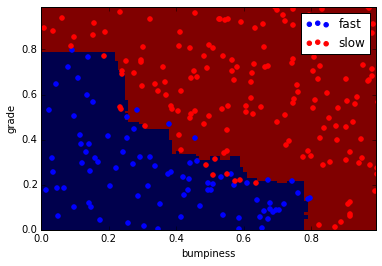

In [132]:
param_grid = dict()
param_grid['n_estimators'] = np.linspace(15, 25, 11).astype(int)
#param_grid['n_estimators'] = np.linspace(15, 25, 11).astype(int)
#param_grid['max_features'] = np.linspace(1, len(features_train[0]), 6).astype(int)
#param_grid['max_depth'] = np.linspace(1000, 100000000, 11).astype(int)
#param_grid['min_samples_split'] = np.linspace(1, 15, 16).astype(int)
#param_grid['min_samples_leaf'] = np.linspace(1, 5, 5).astype(int)
clf = parameters_search(RandomForestClassifier(random_state=0,criterion="entropy",n_estimators=18,min_samples_split=7,min_samples_leaf=1),
                        param_grid, features_train, labels_train, features_test, labels_test)
try:
    prettyPicture(clf, features_test, labels_test)
except NameError:
    pass

k-nn
param_grid = dict()
param_grid['n_neighbors'] = np.linspace(10, 20, 11).astype(int)
param_grid['algorithm'] = ['auto', 'ball_tree', 'kd_tree', 'brute']
param_grid['weights'] = ['uniform', 'distance']
param_grid['leaf_size'] = np.linspace(1, 3, 3).astype(int)
param_grid['p'] = np.linspace(1, 3, 3).astype(int)
clf = parameters_search(KNeighborsClassifier(),
                        param_grid, features_train, labels_train, features_test, labels_test)
try:
    prettyPicture(clf, features_test, labels_test)
except NameError:
    pass

Best parameters set found on development set:
{'n_neighbors': 11, 'p': 1} --> accuracy = 0.94
Grid scores on development set:
0.953 (+/-0.044) for {'n_neighbors': 10, 'p': 1}
0.955 (+/-0.029) for {'n_neighbors': 10, 'p': 2}
0.953 (+/-0.025) for {'n_neighbors': 10, 'p': 3}
0.959 (+/-0.043) for {'n_neighbors': 11, 'p': 1}
0.955 (+/-0.029) for {'n_neighbors': 11, 'p': 2}
0.953 (+/-0.022) for {'n_neighbors': 11, 'p': 3}
0.956 (+/-0.037) for {'n_neighbors': 12, 'p': 1}
0.956 (+/-0.020) for {'n_neighbors': 12, 'p': 2}
0.953 (+/-0.025) for {'n_neighbors': 12, 'p': 3}
0.959 (+/-0.032) for {'n_neighbors': 13, 'p': 1}
0.959 (+/-0.036) for {'n_neighbors': 13, 'p': 2}
0.957 (+/-0.041) for {'n_neighbors': 13, 'p': 3}
0.955 (+/-0.034) for {'n_neighbors': 14, 'p': 1}
0.957 (+/-0.020) for {'n_neighbors': 14, 'p': 2}
0.956 (+/-0.020) for {'n_neighbors': 14, 'p': 3}
0.956 (+/-0.039) for {'n_neighbors': 15, 'p': 1}
0.953 (+/-0.036) for {'n_neighbors': 15, 'p': 2}
0.955 (+/-0.029) for {'n_neighbors': 15, 

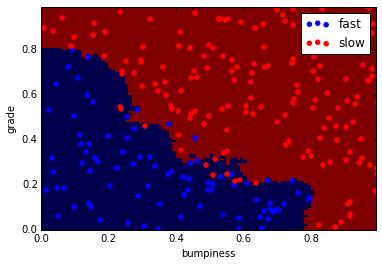

In [165]:
param_grid = dict()
#param_grid['weights'] = ['uniform', 'distance']
param_grid['n_neighbors'] = np.linspace(10, 20, 11).astype(int)
#param_grid['algorithm'] = ['auto', 'ball_tree', 'kd_tree', 'brute']
#param_grid['leaf_size'] = np.linspace(1, 3, 3).astype(int)
param_grid['p'] = np.linspace(1, 3, 3).astype(int)
clf = parameters_search(KNeighborsClassifier(weights='distance',
                                             n_neighbors=11,
                                             leaf_size=30,
                                             algorithm='auto',
                                             p=1),
                        param_grid, features_train, labels_train, features_test, labels_test)
try:
    prettyPicture(clf, features_test, labels_test)
except NameError:
    pass